In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')

In [9]:
df_2019a = pd.read_csv("/Users/mani/Desktop/epik-project-nlp/data/Epik 2019A - sheet1.csv")
df_2019b = pd.read_csv("/Users/mani/Desktop/epik-project-nlp/data/Epik 2019B - sheet1.csv")
df_2020a = pd.read_csv("/Users/mani/Desktop/epik-project-nlp/data/Epik 2020A - sheet1.csv")
df_2020b = pd.read_csv("/Users/mani/Desktop/epik-project-nlp/data/Epik 2020B - sheet1.csv")
df_2021a = pd.read_csv("/Users/mani/Desktop/epik-project-nlp/data/Epik 2021A - sheet1.csv")

In [10]:
df_2019a.head()

,AccountId,AccountNum,Channel,ConversationId,ConversationInitiated,ConversationDate,ConversationDuration,ConversationEndedBy,ConversationEndedCategory,ConversationEndedSubCategory,...,CallLegEndedCategory,CallLegEndedSubCategory,ActiveConversationId,QueueDuration,Duration,Abandoned,VisitorWait,AnyText,AccountHash,OutboundCall
0,f460ad3a-0041-4082-9269-c4ff4e370b44,NaN,Sms,5c2ef355680e5af7063fc976,1546580821371,2019-01-04 05:47:01,43232348,SYSTEM,Timeout,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,VWmmSfM25aauaP,NaN
1,f460ad3a-0041-4082-9269-c4ff4e370b44,NaN,Sms,5c2ef47a680e5af7063fcae0,1546581114286,2019-01-04 05:51:54,43234967,SYSTEM,Timeout,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,VWmmSfM25aauaP,NaN
2,f460ad3a-0041-4082-9269-c4ff4e370b44,NaN,Sms,5c2eecc13e1b9890052f2a11,1546579137193,2019-01-04 05:18:57,45410220,SYSTEM,Timeout,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,VWmmSfM25aauaP,NaN
3,f460ad3a-0041-4082-9269-c4ff4e370b44,NaN,Sms,5c2ef0d0680e5af7063fc747,1546580176263,2019-01-04 05:36:16,44417572,SYSTEM,Timeout,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,VWmmSfM25aauaP,NaN
4,f460ad3a-0041-4082-9269-c4ff4e370b44,NaN,Sms,5c2ef2db680e5af7063fc8d9,1546580699896,2019-01-04 05:44:59,44033069,SYSTEM,Timeout,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,VWmmSfM25aauaP,NaN


In [12]:
df_2020a.head()

,AccountId,AccountNum,Channel,ConversationId,ConversationInitiated,ConversationDate,ConversationDuration,ConversationEndedBy,ConversationEndedCategory,ConversationEndedSubCategory,...,CallLegEndedCategory,CallLegEndedSubCategory,ActiveConversationId,QueueDuration,Duration,Abandoned,VisitorWait,AnyText,AccountHash,OutboundCall
0,f460ad3a-0041-4082-9269-c4ff4e370b44,NaN,Sms,5e0ea7ba9b72c8049cc7d510,1578018746620,2020-01-03 02:32:26,52618798,SYSTEM,Timeout,NaN,...,NaN,NaN,NaN,9413867.0,9413867.0,True,9413867.0,Hi sexy r u available?,VWmmSfM25aauaP,NaN
1,f460ad3a-0041-4082-9269-c4ff4e370b44,NaN,Sms,5e0ea8ed9b72c8049cc7d539,1578019053157,2020-01-03 02:37:33,52327309,SYSTEM,Timeout,NaN,...,NaN,NaN,NaN,9122988.0,9122988.0,True,9122988.0,Are you available,VWmmSfM25aauaP,NaN
2,f460ad3a-0041-4082-9269-c4ff4e370b44,NaN,Sms,5e0ea9e29b72c8049cc7d5b6,1578019298480,2020-01-03 02:41:38,58317021,SYSTEM,Timeout,NaN,...,NaN,NaN,NaN,8897250.0,8897250.0,True,8897250.0,Hi Monica,VWmmSfM25aauaP,NaN
3,f460ad3a-0041-4082-9269-c4ff4e370b44,NaN,Sms,5e0eaa219b72c8049cc7d60a,1578019361858,2020-01-03 02:42:41,52185135,SYSTEM,Timeout,NaN,...,NaN,NaN,NaN,8853999.0,8853999.0,True,8853999.0,Hey are you available,VWmmSfM25aauaP,NaN
4,f460ad3a-0041-4082-9269-c4ff4e370b44,NaN,Sms,5e0eab729b72c8049cc7d738,1578019698551,2020-01-03 02:48:18,51803198,SYSTEM,Timeout,NaN,...,NaN,NaN,NaN,8599685.0,8599685.0,True,8599685.0,Hey are you available,VWmmSfM25aauaP,NaN


In [28]:
df_2020a.describe()

,AccountNum,ConversationInitiated,ConversationDuration,ConversationEndedSubCategory,Initiated,MMS,CallLegEndedBy,CallLegEndedCategory,CallLegEndedSubCategory,ActiveConversationId,QueueDuration,Duration,VisitorWait,OutboundCall
count,0.0,4.245500e+04,4.245500e+04,0.0,4.245500e+04,42455.000000,0.0,0.0,0.0,0.0,7.042000e+03,3.275500e+04,1.249300e+04,0.0
mean,NaN,1.584847e+12,4.615998e+07,NaN,1.584857e+12,0.004593,NaN,NaN,NaN,NaN,2.915001e+07,9.553711e+06,1.063365e+06,NaN
std,NaN,3.935453e+09,1.504181e+07,NaN,3.936383e+09,0.075204,NaN,NaN,NaN,NaN,1.996547e+07,1.759703e+07,4.354096e+06,NaN
min,NaN,1.578019e+12,3.639300e+04,NaN,1.578019e+12,0.000000,NaN,NaN,NaN,NaN,7.080000e+03,0.000000e+00,5.400000e+01,NaN
25%,NaN,1.581402e+12,4.321255e+07,NaN,1.581437e+12,0.000000,NaN,NaN,NaN,NaN,2.028249e+06,3.731950e+04,3.732300e+04,NaN
50%,NaN,1.584072e+12,4.510602e+07,NaN,1.584075e+12,0.000000,NaN,NaN,NaN,NaN,4.320319e+07,1.225930e+05,8.577600e+04,NaN
75%,NaN,1.588440e+12,4.919125e+07,NaN,1.588458e+12,0.000000,NaN,NaN,NaN,NaN,4.320934e+07,2.497576e+06,2.330810e+05,NaN
max,NaN,1.593559e+12,1.365009e+08,NaN,1.593660e+12,3.000000,NaN,NaN,NaN,NaN,1.096861e+08,1.096861e+08,7.706964e+07,NaN


In [16]:
def plot_histogram(df: pd.DataFrame, col_name: str):
    """
    Plots a histogram of a given for a dataframe

    Parameters:
        df (pandas DataFrame): dataframe containing columns with numeric types
        col_name (str): the name of the column that will have its histogram plotted

    Returns:
        Displays a histogram of the specified column
    """
    plt.hist(df[col_name])
    plt.xlabel(col_name)
    plt.ylabel("Frequency")
    plt.title(f'{col_name} Distribution')

In [17]:
df_2019a.ConversationEndedBy.unique()

array(['SYSTEM', 'Agent', '4807580250', '3139481840', '5208123730',
       '2489100537', '7707272514', '2146174116'], dtype=object)

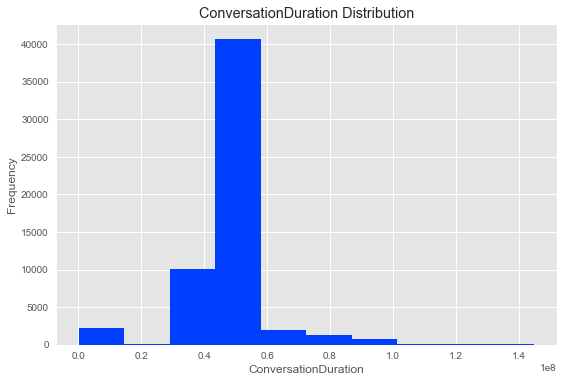

In [78]:
plot_histogram(df_2019a, "ConversationDuration")

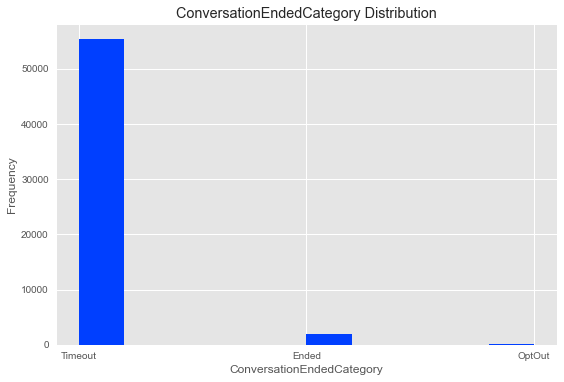

In [79]:
plot_histogram(df_2019a, "ConversationEndedCategory")

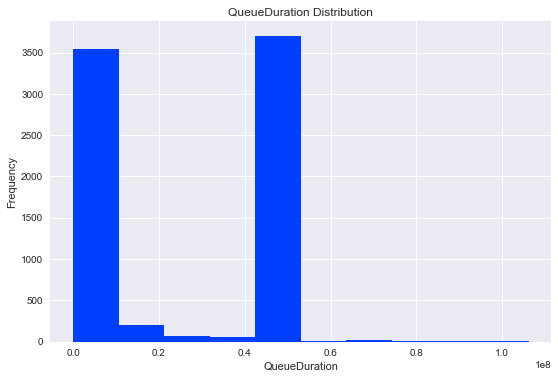

In [70]:
plot_histogram(df_2019a, "QueueDuration")

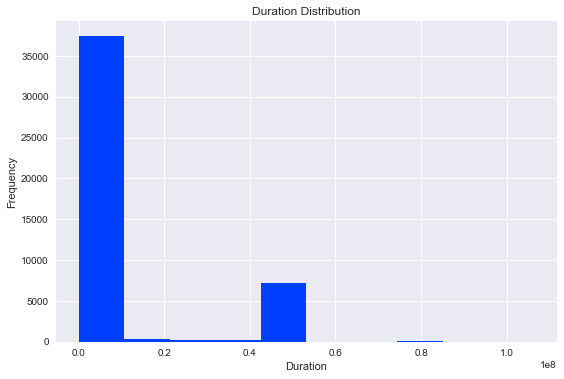

In [71]:
plot_histogram(df_2019a, "Duration")

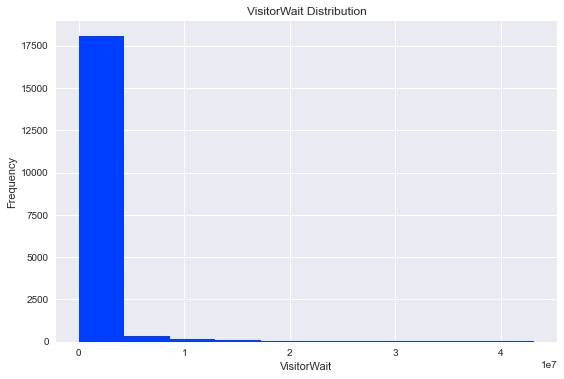

In [72]:
plot_histogram(df_2019a, "VisitorWait")

In [42]:
test = df_2020a.groupby('ConversationId')

In [48]:
df_2020a[df_2020a.ConversationId == '5e0ea7ba9b72c8049cc7d510'].head()

,AccountId,AccountNum,Channel,ConversationId,ConversationInitiated,ConversationDate,ConversationDuration,ConversationEndedBy,ConversationEndedCategory,ConversationEndedSubCategory,...,CallLegEndedCategory,CallLegEndedSubCategory,ActiveConversationId,QueueDuration,Duration,Abandoned,VisitorWait,AnyText,AccountHash,OutboundCall
0,f460ad3a-0041-4082-9269-c4ff4e370b44,NaN,Sms,5e0ea7ba9b72c8049cc7d510,1578018746620,2020-01-03 02:32:26,52618798,SYSTEM,Timeout,NaN,...,NaN,NaN,NaN,9413867.0,9413867.0,True,9413867.0,Hi sexy r u available?,VWmmSfM25aauaP,NaN
205,f460ad3a-0041-4082-9269-c4ff4e370b44,NaN,Sms,5e0ea7ba9b72c8049cc7d510,1578018746620,2020-01-03 02:32:26,52618798,SYSTEM,Timeout,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,VWmmSfM25aauaP,NaN
1940,f460ad3a-0041-4082-9269-c4ff4e370b44,NaN,Sms,5e0ea7ba9b72c8049cc7d510,1578018746620,2020-01-03 02:32:26,52618798,SYSTEM,Timeout,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,VWmmSfM25aauaP,NaN
1941,f460ad3a-0041-4082-9269-c4ff4e370b44,NaN,Sms,5e0ea7ba9b72c8049cc7d510,1578018746620,2020-01-03 02:32:26,52618798,SYSTEM,Timeout,NaN,...,NaN,NaN,NaN,NaN,43204931.0,True,NaN,hi there,VWmmSfM25aauaP,NaN


<AxesSubplot:xlabel='ParticipantRole'>

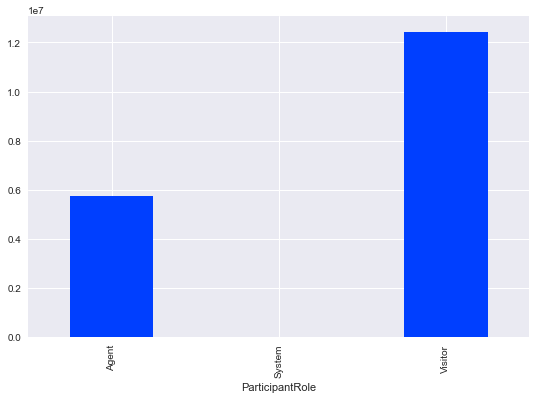

In [73]:
df_2020a.groupby('ParticipantRole')['Duration'].mean().plot.bar()

In [51]:
df_2020a['ParticipantRole']

0        Visitor
1        Visitor
2        Visitor
3        Visitor
4        Visitor
          ...   
42450     System
42451    Visitor
42452     System
42453     System
42454     System
Name: ParticipantRole, Length: 42455, dtype: object